<a href="https://colab.research.google.com/github/JessicaLLenz/DSCIrepo/blob/main/bdfatLab1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import plotnine as p9
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

# Load data

In [3]:
(bdfat := pl.read_csv("/bodyfat.csv"))

density,bodyfat,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
1.0414,25.3,22,154.0,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
1.034,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1.0736,11.0,70,134.25,67.0,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
1.0236,33.6,72,201.0,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
1.0328,29.3,72,186.75,66.0,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0


# Box Plot

## Stack predictors

In [11]:
(predictors :=
    bdfat
    .select(cs.by_name('bodyfat') | cs.exclude('density', 'bodyfat'))
    .unpivot(on=cs.exclude('bodyfat', 'density'),
             index='bodyfat',
             variable_name='predictor',
             value_name='value')
    .to_pandas()
)



,bodyfat,predictor,value
0,12.3,age,23.0
1,6.1,age,22.0
2,25.3,age,22.0
3,10.4,age,26.0
4,28.7,age,24.0
...,...,...,...
3271,11.0,wrist,18.5
3272,33.6,wrist,20.1
3273,29.3,wrist,18.0
3274,26.0,wrist,19.8


## Use sns.catplot

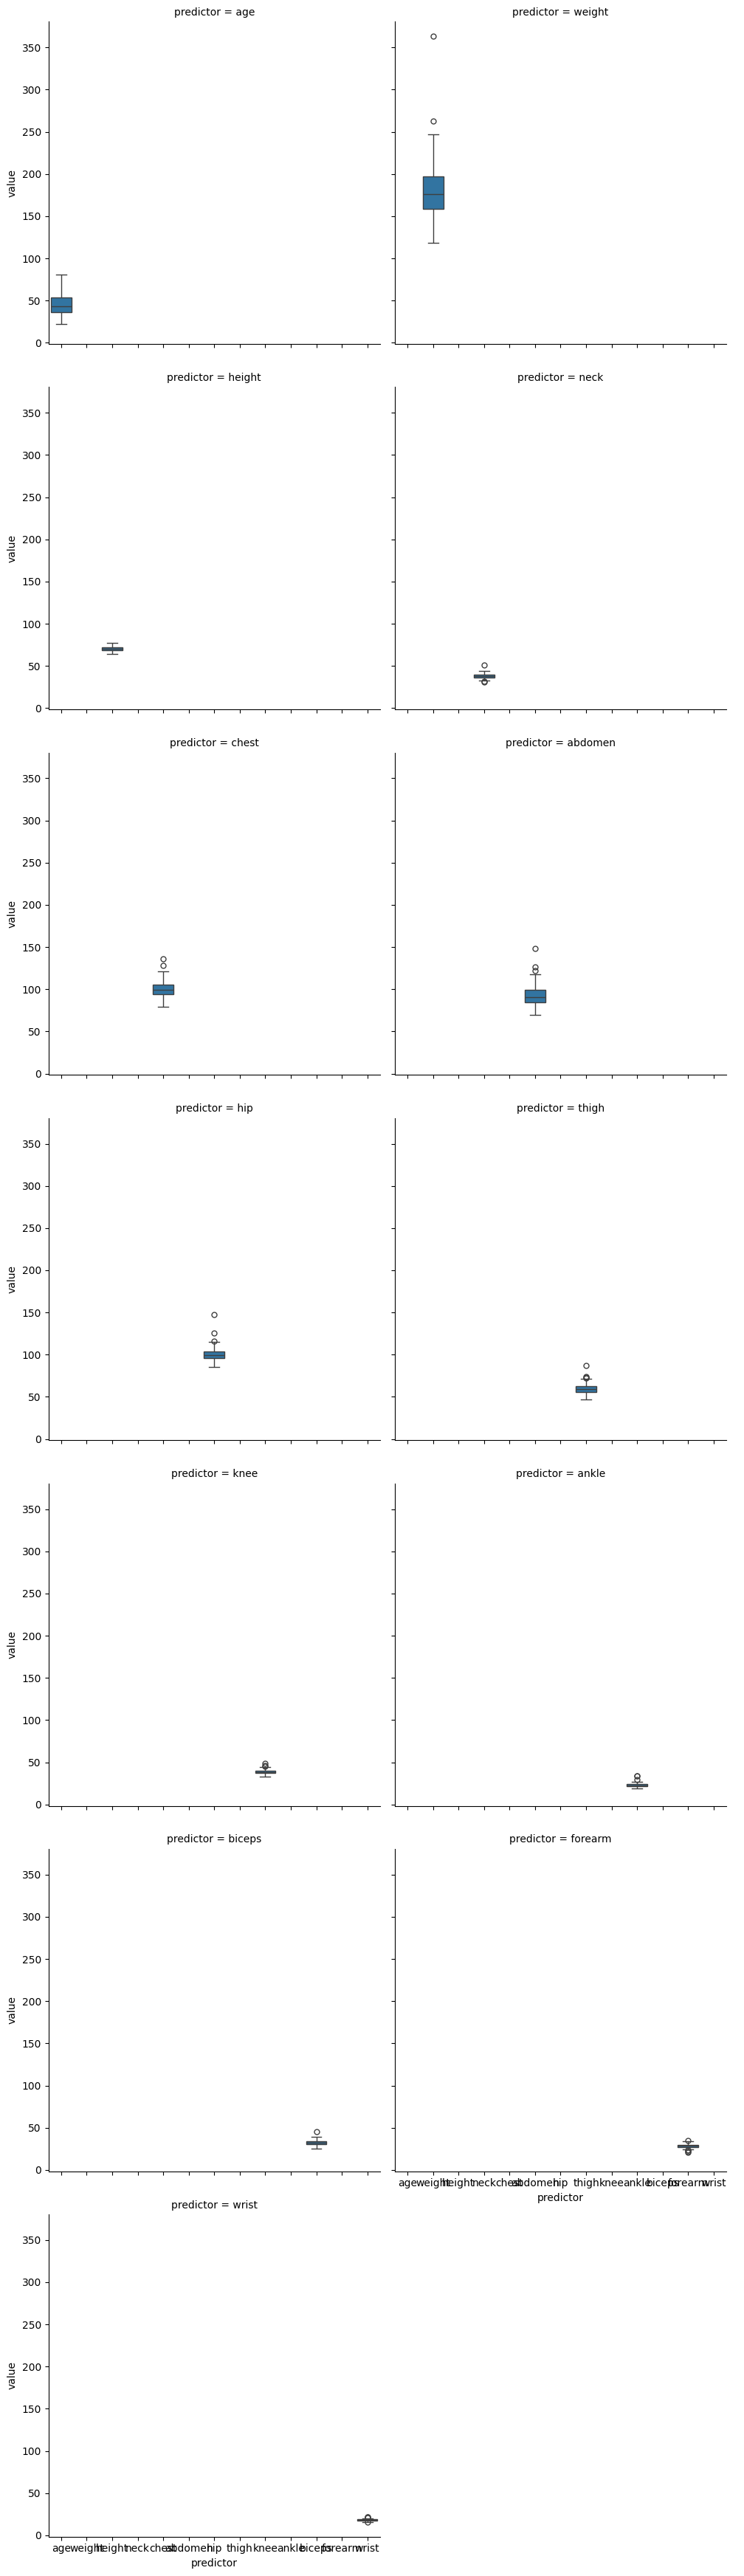

In [13]:
sns.catplot(data=predictors, col= 'predictor', x='predictor', y='value', kind='box', col_wrap=2)

### Summary:
#### These box plots visualize the distribution of each predictor variable (age, weight, height, neck, chest, abdomen, hip, thigh, knee, ankle, biceps, forearm, and wrist) against the bodyfat variable. Each box plot shows the median, interquartile range, and potential outliers for a given predictor. By looking at these plots, we can understand the spread and central tendency of each measurement, and how they vary across the dataset.

# Pairs plot

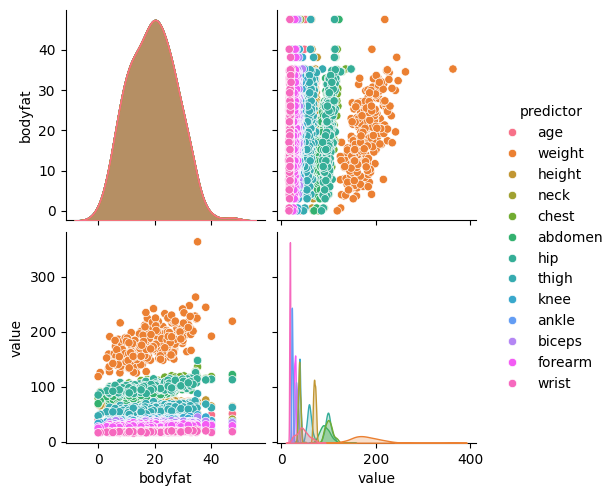

In [18]:
sns.pairplot(predictors, hue='predictor')

### Summary:
#### Each subplot in the grid shows a scatter plot of one predictor against another, allowing us to observe correlations and patterns. The diagonal subplots typically show a histogram or Kernel Density Estimate for each variable, illustrating its distribution. By coloring points based on the 'predictor' (which is actually the 'value' column in this stacked format, with 'hue' distinguishing the different original predictor types), we can discern how the distribution of values for each original predictor varies across different ranges of other predictors. This helps in identifying potential linear or non-linear relationships, clusters, and outliers across the dataset.

# Group by predictor

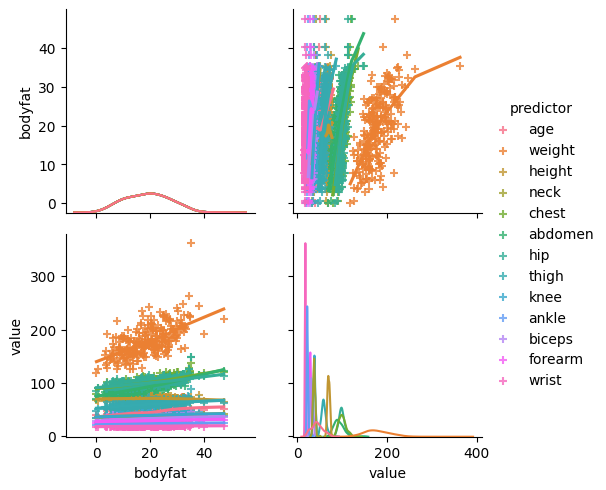

In [19]:
p = sns.PairGrid(predictors, hue='predictor')
p.map_diag(sns.kdeplot)
p.map_offdiag(sns.regplot,
              lowess = True,
              marker = "+",
              )
p.add_legend()

### Summary:
#### The diagonal plots now display Kernel Density Estimates, which show the distribution of each individual predictor variable more smoothly than a histogram, indicating where the data is concentrated. The off-diagonal plots, showing scatter plots with sns.regplot, include both the individual data points and a locally weighted scatterplot smoothing regression line. This line helps visualize the non-linear relationships between pairs of predictors, while the '+' marker makes individual data points visible. The hue='predictor' mapping ensures that each original predictor variable (e.g., 'age', 'weight') is distinctly colored across all subplots, allowing for an immediate visual comparison of their distributions and interrelationships.